In [21]:
import pandas as pd
import math

def split_excel_70_15_15(file_path):
    # قراءة الملف
    df = pd.read_csv(file_path)

    # Shuffle عشوائي بالكامل (كل مرة مختلف)
    df = df.sample(frac=1).reset_index(drop=True)

    total_rows = len(df)

    # تحديد أحجام الأجزاء
    part1_size = math.floor(total_rows * 0.70)
    part2_size = math.floor(total_rows * 0.15)
    part3_size = total_rows - part1_size - part2_size

    # تقسيم البيانات
    part1 = df.iloc[:part1_size]
    part2 = df.iloc[part1_size : part1_size + part2_size]
    part3 = df.iloc[part1_size + part2_size :]

    # حفظ الملفات
    part1.to_csv("train.csv", index=False)
    part2.to_csv("test.csv", index=False)
    part3.to_csv("val.csv", index=False)

    print("✔ File successfully split into 70% / 15% / 15% with RANDOM shuffling")

# مثال الاستخدام
split_excel_70_15_15("Real estate.csv")


✔ File successfully split into 70% / 15% / 15% with RANDOM shuffling


In [17]:
import pandas as pd

def handle_missing_values(train_path, val_path, test_path, strategy="fill"):
    """
    Handle missing values in train, validation, and test files.
    
    - Always compute mean/std ONLY from train.
    - Apply the same filling strategy to val and test.
    """

    # قراءة الملفات
    train = pd.read_csv(train_path)
    val = pd.read_csv(val_path)
    test = pd.read_csv(test_path)

    # حساب المتوسطات من بيانات train فقط
    train_means = train.mean(numeric_only=True)

    # تنظيف ملف واحد (دالة داخلية)
    def clean_file(df):
        df_clean = df.copy()
        for col in df_clean.columns:
            if df_clean[col].dtype in ["float64", "int64"]:

                # تطبيق mean المحسوب من train
                if col in train_means:
                    df_clean[col].fillna(train_means[col], inplace=True)

            else:
                # النصوص → استبدال بالفراغ
                df_clean[col].fillna("", inplace=True)

        return df_clean

    # تنظيف الثلاث ملفات
    train_clean = clean_file(train)
    val_clean = clean_file(val)
    test_clean = clean_file(test)

    print("✔ Missing values handled successfully using train statistics")

    return train_clean, val_clean, test_clean


# ---------------------------
# مثال على الاستخدام
# ---------------------------

train_clean, val_clean, test_clean = handle_missing_values(
    "train.csv",
    "val.csv",
    "test.csv",
    strategy="fill"
)

# حفظ الملفات بعد التصحيح
train_clean.to_csv("train_cleaned.csv", index=False)
val_clean.to_csv("validation_cleaned.csv", index=False)
test_clean.to_csv("test_cleaned.csv", index=False)

print("✔ All cleaned files saved!")

✔ Missing values handled successfully using train statistics
✔ All cleaned files saved!


C:\Users\islam\AppData\Local\Temp\ipykernel_6292\1700935426.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(train_means[col], inplace=True)


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# ===== 1. Load the CLEANED datasets =====
train = pd.read_csv("train_cleaned.csv")
test  = pd.read_csv("test_cleaned.csv")
val   = pd.read_csv("validation_cleaned.csv")

# ===== 2. Identify target column =====
target_col = "Y house price of unit area"

X_train = train.drop(target_col, axis=1)
y_train = train[target_col]

X_test = test.drop(target_col, axis=1)
y_test = test[target_col]

X_val = val.drop(target_col, axis=1)
y_val = val[target_col]

# ===== 3. Scaling =====
scaler = StandardScaler()

# Fit فقط على TRAIN ✔️
X_train_scaled = scaler.fit_transform(X_train)

# Transform للـ others
X_test_scaled = scaler.transform(X_test)
X_val_scaled  = scaler.transform(X_val)

# ===== 4. Save scaled data =====
pd.DataFrame(X_train_scaled, columns=X_train.columns).to_csv("train_scaled.csv", index=False)
pd.DataFrame(X_test_scaled,  columns=X_test.columns).to_csv("test_scaled.csv", index=False)
pd.DataFrame(X_val_scaled,   columns=X_val.columns).to_csv("val_scaled.csv", index=False)

# Save y
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
y_val.to_csv("y_val.csv", index=False)

print("✔️ Scaling completed successfully!")
print("✔️ Generated CSV files saved correctly")

# ===== 5. Save scaler =====
joblib.dump(scaler, "scaler.pkl")


✔️ Scaling completed successfully!
✔️ Generated CSV files saved correctly


['scaler.pkl']

===== Correlation Matrix =====
                                              No  X1 transaction date  \
No                                      1.000000            -0.082264   
X1 transaction date                    -0.082264             1.000000   
X2 house age                           -0.006545             0.035641   
X3 distance to the nearest MRT station  0.064451             0.075346   
X4 number of convenience stores        -0.055879             0.021976   
X5 latitude                            -0.047256             0.010511   
X6 longitude                           -0.089514            -0.047649   
Target                                 -0.070758             0.073815   

                                        X2 house age  \
No                                         -0.006545   
X1 transaction date                         0.035641   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.010555   
X4 number of convenience stores

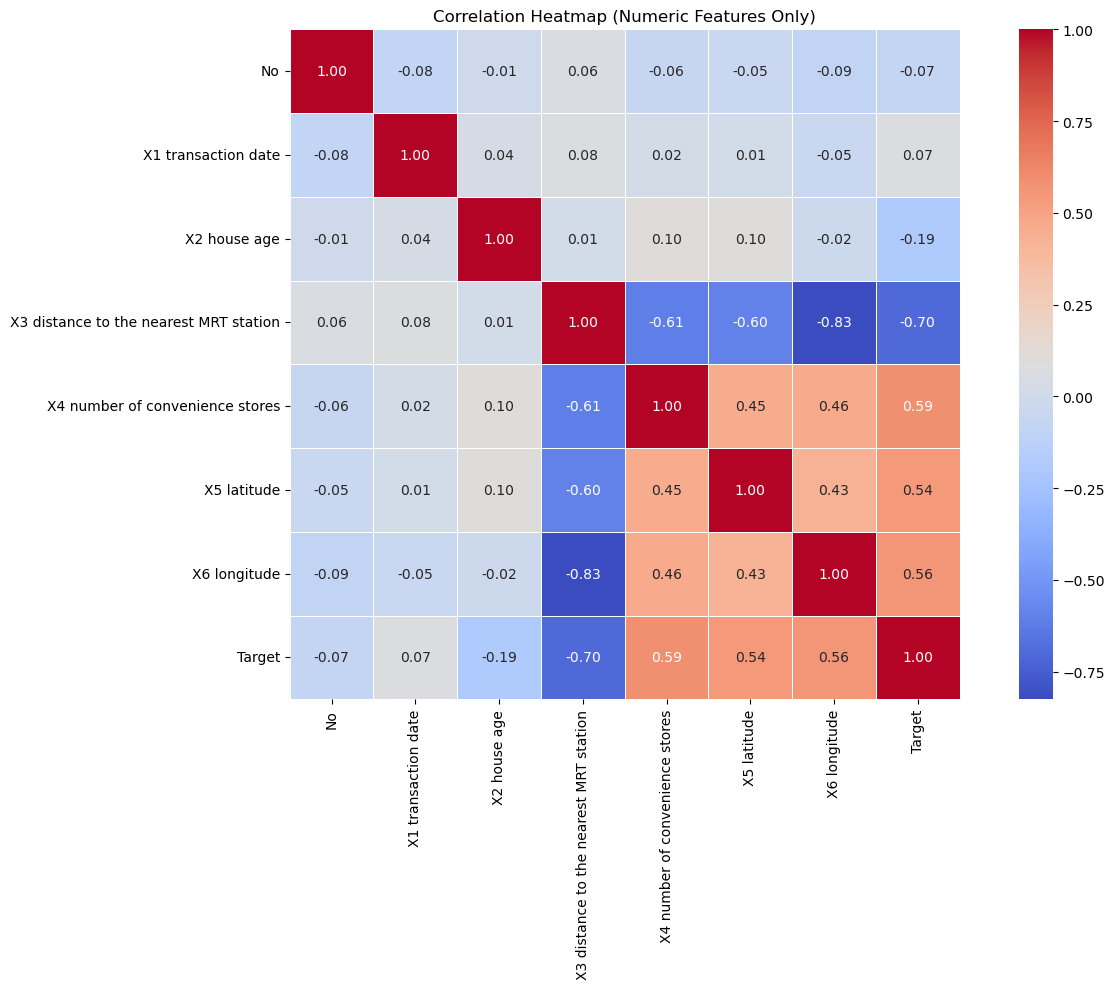


===== Correlation with Target =====
Target                                    1.000000
X4 number of convenience stores           0.588280
X6 longitude                              0.564940
X5 latitude                               0.539539
X1 transaction date                       0.073815
No                                       -0.070758
X2 house age                             -0.185820
X3 distance to the nearest MRT station   -0.701865
Name: Target, dtype: float64


C:\Users\islam\AppData\Local\Temp\ipykernel_6292\3358871378.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


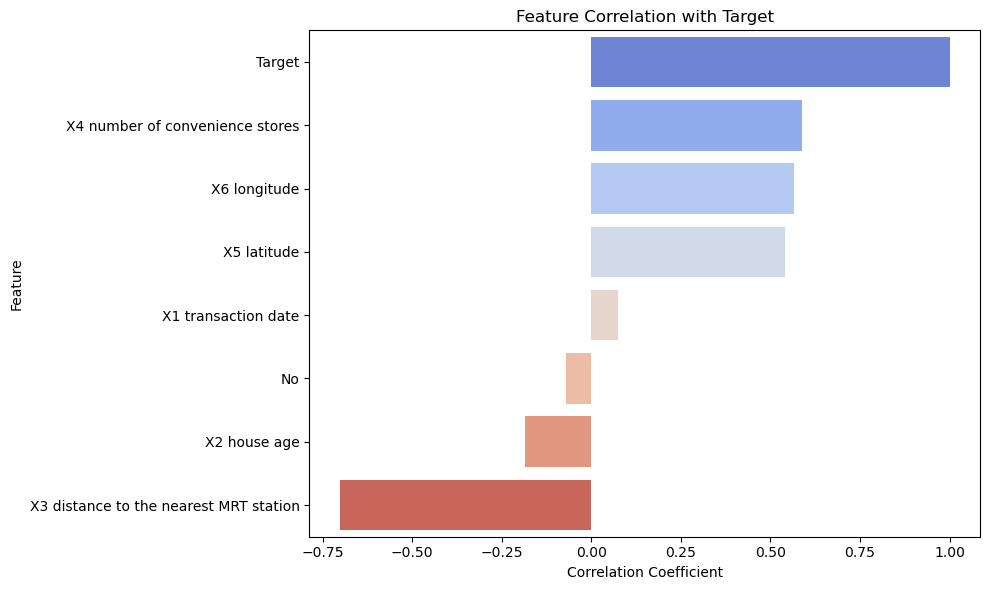

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ======================================================
# 1. Load scaled training data
# ======================================================
X_train = pd.read_csv("train_scaled.csv")
y_train = pd.read_csv("y_train.csv").squeeze()  # تحويل إلى Series

# دمج الميزات مع الهدف
df = X_train.copy()
df["Target"] = y_train

# ======================================================
# 2. Select ONLY numeric features
# ======================================================
numeric_df = df.select_dtypes(include=["int64", "float64", "float32", "int32"])

# ======================================================
# 3. Compute Correlation Matrix
# ======================================================
corr_matrix = numeric_df.corr()

print("===== Correlation Matrix =====")
print(corr_matrix)

# ======================================================
# 4. Correlation Heatmap (with values inside)
# ======================================================
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

# ======================================================
# 5. Correlation with Target ONLY (sorted)
# ======================================================
corr_with_target = corr_matrix["Target"].sort_values(ascending=False)

print("\n===== Correlation with Target =====")
print(corr_with_target)

# ======================================================
# 6. Barplot for correlation with Target
# ======================================================
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_with_target.values,
    y=corr_with_target.index,
    palette="coolwarm"
)
plt.title("Feature Correlation with Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



📌 Correlation with Target (Descending):
X4 number of convenience stores           0.588280
X6 longitude                              0.564940
X5 latitude                               0.539539
X2 house age                             -0.185820
X3 distance to the nearest MRT station   -0.701865
Name: Target, dtype: float64


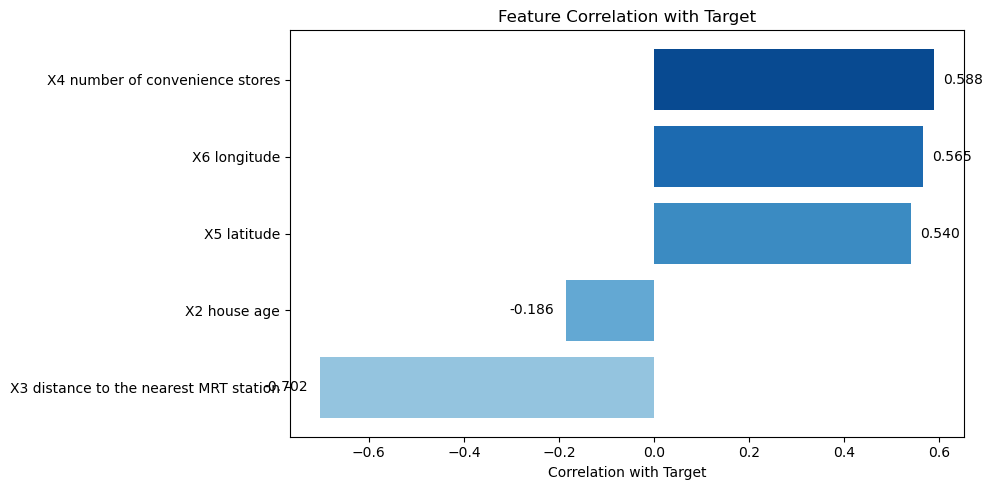

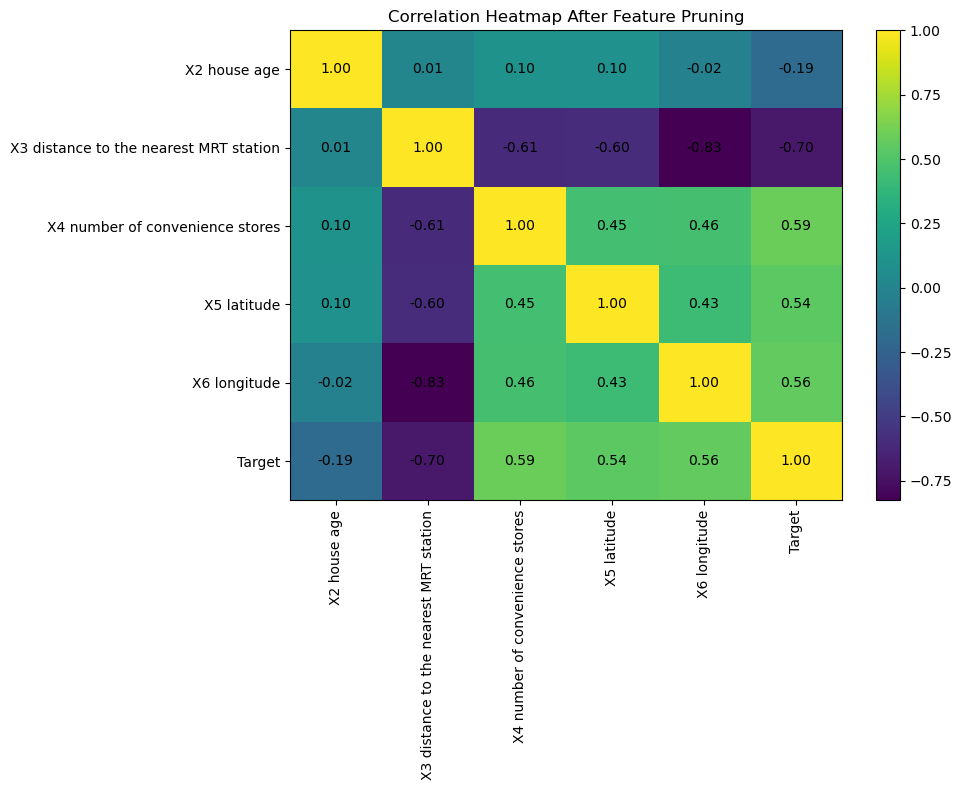


📁 Saved:
 - train_filtered.csv
 - val_filtered.csv
 - test_filtered.csv

🔻 Dropped (weak correlation): ['No', 'X1 transaction date']
🔻 Dropped (high correlation): []


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# =============================
# دالة التصفية مع استثناء أعمدة معينة
# =============================
def prune_features_by_correlation(
        df,
        target_series,
        weak_thresh=(-0.1, 0.1),
        high_corr_thresh=0.85,
        do_shuffle=False,
        keep_columns=None):   # ← أعمدة لن تُحذف
    """
    df: DataFrame للميزات (بدون target)
    target_series: Series للهدف
    weak_thresh: حد الارتباط الضعيف
    high_corr_thresh: حد الارتباط بين الميزات
    do_shuffle: هل تريد خلط البيانات قبل الحساب
    keep_columns: list of column names to never drop
    """

    if keep_columns is None:
        keep_columns = []

    df = df.copy().reset_index(drop=True)
    target_series = target_series.reset_index(drop=True)

    # ========= (اختياري) Shuffle ==========
    if do_shuffle:
        df[target_series.name] = target_series
        df = df.sample(frac=1, random_state=42).reset_index(drop=True)
        target_series = df[target_series.name]
        df = df.drop(columns=[target_series.name])

    target_name = target_series.name if target_series.name else "Target"
    df[target_name] = target_series

    # مصفوفة الارتباط
    corr = df.corr()

    # STEP 1: حذف الميزات ضعيفة الارتباط مع الهدف
    low, high = weak_thresh
    weak_features = corr[target_name][(corr[target_name] > low) & (corr[target_name] < high)].index.tolist()
    weak_features = [f for f in weak_features if f != target_name and f not in keep_columns]

    if weak_features:
        df = df.drop(columns=weak_features)
        corr = df.corr()

    # STEP 2: حذف الميزات ذات الترابط العالي
    features = list(df.columns)
    if target_name in features:
        features.remove(target_name)

    to_drop = set()
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            f1, f2 = features[i], features[j]
            if abs(corr.loc[f1, f2]) >= high_corr_thresh:
                corr_f1 = abs(corr.loc[f1, target_name])
                corr_f2 = abs(corr.loc[f2, target_name])
                # نحافظ على الأعمدة المهمة
                if f1 in keep_columns:
                    to_drop.add(f2)
                elif f2 in keep_columns:
                    to_drop.add(f1)
                else:
                    if corr_f1 < corr_f2:
                        to_drop.add(f1)
                    else:
                        to_drop.add(f2)

    if to_drop:
        df = df.drop(columns=list(to_drop))

    remaining_df = df.drop(columns=[target_name])
    return remaining_df, sorted(list(to_drop)), sorted(weak_features)

# =============================
# MAIN
# =============================

# التأكد من وجود الملفات
for fname in ["train_scaled.csv", "val_scaled.csv", "test_scaled.csv", "y_train.csv"]:
    if not os.path.exists(fname):
        print(f"⚠️ الملف {fname} غير موجود!")
        sys.exit(1)

# قراءة البيانات
df_train = pd.read_csv("train_scaled.csv")
Y_train = pd.read_csv("y_train.csv").squeeze()
Y_train.name = "Target"

df_val = pd.read_csv("val_scaled.csv")
df_test = pd.read_csv("test_scaled.csv")

# تطبيق التصفية مع الاحتفاظ بالعمود X1
filtered_train, dropped_corr, dropped_weak = prune_features_by_correlation(
    df_train,
    Y_train,
    weak_thresh=(-0.1, 0.1),
    high_corr_thresh=0.85,
    do_shuffle=False,
    keep_columns=["X1"]   # ← الأعمدة المهمة التي لا تُحذف
)

if filtered_train.shape[1] == 0:
    raise RuntimeError("❌ كل الميزات انحذفت — عدل العتبات أو الأعمدة المستثناة")

# مصفوفة الارتباط بعد التصفية
corr_new = filtered_train.assign(Target=Y_train).corr()
feature_target_corr = corr_new["Target"].drop("Target").sort_values(ascending=False)

print("\n📌 Correlation with Target (Descending):")
print(feature_target_corr)

# ------------------------------
# BARH PLOT
# ------------------------------
corr_values = feature_target_corr.sort_values(ascending=True)
plt.figure(figsize=(10, 5))
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(corr_values)))
plt.barh(corr_values.index, corr_values.values, color=colors)
plt.xlabel("Correlation with Target")
plt.title("Feature Correlation with Target")
for i, (feat, v) in enumerate(zip(corr_values.index, corr_values.values)):
    offset = 0.02
    plt.text(v + offset if v >= 0 else v - offset - 0.005,
             i,
             f"{v:.3f}",
             va='center',
             ha='left' if v >= 0 else 'right')
plt.tight_layout()
plt.show()

# ------------------------------
# HEATMAP
# ------------------------------
plt.figure(figsize=(10, 8))
plt.imshow(corr_new, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(corr_new.columns)), corr_new.columns, rotation=90)
plt.yticks(np.arange(len(corr_new.index)), corr_new.index)
for i in range(len(corr_new.index)):
    for j in range(len(corr_new.columns)):
        plt.text(j, i, f"{corr_new.iloc[i, j]:.2f}", ha='center', va='center')
plt.title("Correlation Heatmap After Feature Pruning")
plt.tight_layout()
plt.show()

# ------------------------------
# حفظ الملفات بعد التصفية
# ------------------------------
filtered_train.to_csv("train_filtered.csv", index=False)

columns_to_keep = filtered_train.columns.tolist()
val_filtered = df_val[columns_to_keep]
test_filtered = df_test[columns_to_keep]

val_filtered.to_csv("val_filtered.csv", index=False)
test_filtered.to_csv("test_filtered.csv", index=False)

print("\n📁 Saved:")
print(" - train_filtered.csv")
print(" - val_filtered.csv")
print(" - test_filtered.csv")
print("\n🔻 Dropped (weak correlation):", dropped_weak)
print("🔻 Dropped (high correlation):", dropped_corr)



===== Train Evaluation =====
RMSE: 5.9898
MAE:  3.5355
R²:   0.7792

===== Validation Evaluation =====
RMSE: 11.2962
MAE:  5.6296
R²:   0.5087

===== Test Evaluation =====
RMSE: 6.9401
MAE:  5.0951
R²:   0.7632


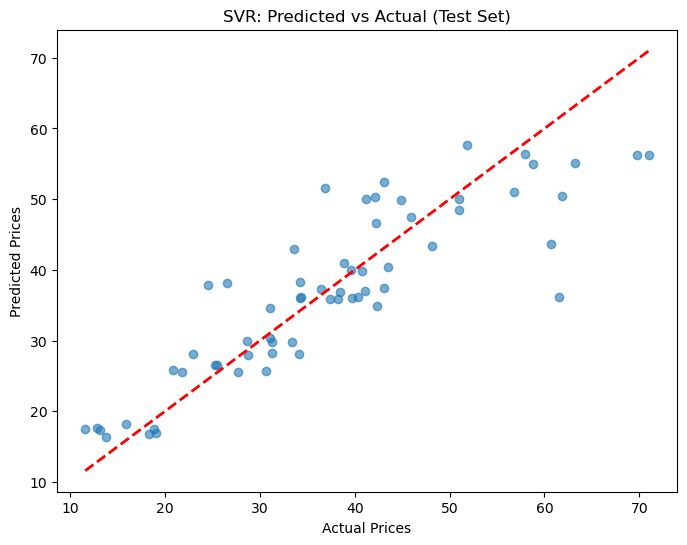

In [12]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# ============================
# 1. Load Data
# ============================
X_train = pd.read_csv("train_filtered.csv")
y_train = pd.read_csv("y_train.csv").squeeze()

X_val = pd.read_csv("val_filtered.csv")
y_val = pd.read_csv("y_val.csv").squeeze()

X_test = pd.read_csv("test_filtered.csv")
y_test = pd.read_csv("y_test.csv").squeeze()

# ============================
# 2. Define SVR Model
# ============================
model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
# (C و epsilon تقدر تعدلهم لاحقًا للتجريب)


# ============================
# 3. Train the Model
# ============================
model.fit(X_train, y_train)

# ============================
# 4. Predictions
# ============================
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

# ============================
# 5. Evaluation Functions
# ============================
def evaluate(y_true, y_pred, name="Set"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n===== {name} Evaluation =====")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")

# ============================
# 6. Evaluate on All Sets
# ============================
evaluate(y_train, train_pred, "Train")
evaluate(y_val, val_pred, "Validation")
evaluate(y_test, test_pred, "Test")

# ============================
# 7. Plot Predicted vs Actual (Test Set)
# ============================
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR: Predicted vs Actual (Test Set)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.show()


✔️ Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
✔️ Best CV R² (log scale): 0.7400036576309675

===== Train Evaluation =====
RMSE: 4.1123
MAE:  2.7696
R²:   0.8959

===== Validation Evaluation =====
RMSE: 10.8281
MAE:  5.3995
R²:   0.5485

===== Test Evaluation =====
RMSE: 6.3191
MAE:  4.5126
R²:   0.8037


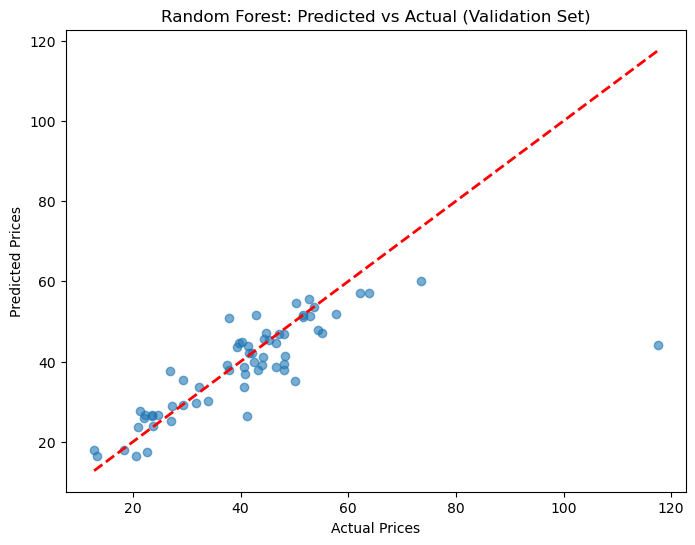

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# ============================
# 1. Load Data
# ============================
X_train = pd.read_csv("train_filtered.csv")
y_train = pd.read_csv("y_train.csv").squeeze()

X_val = pd.read_csv("val_filtered.csv")
y_val = pd.read_csv("y_val.csv").squeeze()

X_test = pd.read_csv("test_filtered.csv")
y_test = pd.read_csv("y_test.csv").squeeze()

# ============================
# 2. Log Transform Prices
# ============================
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

# ============================
# 3. Hyperparameter Search (Reduce Overfitting)
# ============================
param_dist = {
    'n_estimators': [500, 1000],
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=50, cv=5, scoring='r2', n_jobs=-1, random_state=42
)

# ============================
# 4. Train the Model
# ============================
random_search.fit(X_train, y_train_log)
best_rf = random_search.best_estimator_

print("✔️ Best Hyperparameters:", random_search.best_params_)
print("✔️ Best CV R² (log scale):", random_search.best_score_)

# ============================
# 5. Predictions (log scale)
# ============================
train_pred_log = best_rf.predict(X_train)
val_pred_log = best_rf.predict(X_val)
test_pred_log = best_rf.predict(X_test)

# ============================
# 6. Convert back to original scale
# ============================
train_pred = np.expm1(train_pred_log)
val_pred = np.expm1(val_pred_log)
test_pred = np.expm1(test_pred_log)

# ============================
# 7. Evaluation Function
# ============================
def evaluate(y_true, y_pred, name="Set"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n===== {name} Evaluation =====")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")

# ============================
# 8. Evaluate
# ============================
evaluate(y_train, train_pred, "Train")
evaluate(y_val, val_pred, "Validation")
evaluate(y_test, test_pred, "Test")

# ============================
# 9. Plot Predicted vs Actual (Validation Set)
# ============================
plt.figure(figsize=(8,6))
plt.scatter(y_val, val_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Predicted vs Actual (Validation Set)")
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         'r--', linewidth=2)
plt.show()
